In [3]:
import warnings
warnings.filterwarnings("ignore")


from optimization import Bayesian_optimization
from algo import *
from model import Model
from method import Method_select
from utils import preprocess_Nova_data

import os
os.chdir('../../Bayesian_main')
        

Pre-processed data and choose mode (IID or OoD)

FileNotFoundError: [Errno 2] No such file or directory: './backup/mask_.datasetNovaScotia2.png'

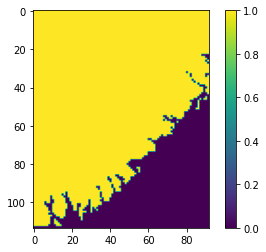

In [4]:
data_dir = 'data/'
path = data_dir + 'Nova.pkl'
preprocess_Nova_data(data_dir='./dataset/NovaScotia2', output_path=path)

mode = 'IID'

Automatically decide an algorithm with metric scores

In [4]:
algo_list = [rfcAlgo, extAlgo, svmAlgo, NNAlgo, gBoostAlgo]
method = Method_select(algo_list)
algo = method.select(data_path=path, task=Model, mode=mode)

print(f"Use {algo.__name__}")

svmAlgo, score: -4.2910
extAlgo, score: -2.7108
rfcAlgo, score: -2.8303
gBoostAlgo, score: -2.8125


Bayesian optimization process

In [ ]:
bo = Bayesian_optimization(
    data_path=path, 
    algorithm=algo, 
    mode=mode,
    metrics=['f1', 'auc'],
    default_params= True
    )

x_best = bo.optimize(300, early_stop = 20)